<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Linear-Regression---Cars-Dataset" data-toc-modified-id="Linear-Regression---Cars-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linear Regression - Cars Dataset</a></span><ul class="toc-item"><li><span><a href="#Load-Libraries" data-toc-modified-id="Load-Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load Libraries</a></span></li><li><span><a href="#Obtain/Load-Data" data-toc-modified-id="Obtain/Load-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Obtain/Load Data</a></span></li><li><span><a href="#Scrub-the-Data" data-toc-modified-id="Scrub-the-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Scrub the Data</a></span></li><li><span><a href="#EDA---Visualizing-the-Data" data-toc-modified-id="EDA---Visualizing-the-Data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>EDA - Visualizing the Data</a></span></li><li><span><a href="#How-should-we-deal-with-categorical-features?" data-toc-modified-id="How-should-we-deal-with-categorical-features?-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>How should we deal with categorical features?</a></span></li><li><span><a href="#Dealing-with-Outliers" data-toc-modified-id="Dealing-with-Outliers-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Dealing with Outliers</a></span></li><li><span><a href="#Checking-Assumptions" data-toc-modified-id="Checking-Assumptions-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Checking Assumptions</a></span></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Modelling</a></span></li></ul></li></ul></div>

# Linear Regression - Cars Dataset 

## Load Libraries 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

plt.style.use('ggplot')

In [2]:
#pick a style - make visuals your own 
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

## Obtain/Load Data
* Obtain and research the data 
    - <p style="color:blue">How do we research the data?</p>
* Load into notebook with Pandas 
* View basic info and summary stats
    - <p style="color:blue">How do descriptive stats help us? What are we looking for?</p>

In [3]:
df = pd.read_csv("cars.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


In [5]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


## Scrub the Data 

<p style="color:blue">For Linear Regression analysis, we must eliminate null values and fill in missing ones. All of our features must be numerically encoded. It's wise to eliminate spaces and capital letters from your column names. We should also deal with duplicates and outliers however modelling is an iterative process. for example, we do not NEED to elimnate outliers at this step. Sometimes outliers are very informative but they will not work in our model, why?</p>

* Do we have missing values? 
* Do we need to change any of our dtypes? 
* How about the column names? 
* Should we drop any columns? 
* Are there duplicates? Missing or Null values? 
* Check for outliers. 

In [6]:
#renaming columns 
df = df.rename(columns={'Engine Fuel Type': 'fuel_type',
                        'Engine HP': 'ehp',
                        'Engine Cylinders': 'cylinders', 
                        'Transmission Type': 'trans_type',
                        'Number of Doors': 'num_doors',
                        'Market Category': 'market_cat',
                        'Vehicle Size': 'vehicle_size',
                        'Vehicle Style': 'vehicle_style',
                        'highway MPG': 'highway_mpg', 
                        'city mpg': 'city_mpg',
                        'Popularity': 'popularity',
                        'MSRP': 'msrp'})

In [7]:
duplicate_rows_df = df[df.duplicated()]
print(duplicate_rows_df.shape)

(715, 16)


In [8]:
df.shape

(11914, 16)

In [9]:
df.count()

Make             11914
Model            11914
Year             11914
fuel_type        11911
ehp              11845
cylinders        11884
trans_type       11914
Driven_Wheels    11914
num_doors        11908
market_cat        8172
vehicle_size     11914
vehicle_style    11914
highway_mpg      11914
city_mpg         11914
popularity       11914
msrp             11914
dtype: int64

In [11]:
df = df.drop_duplicates()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11199 entries, 0 to 11913
Data columns (total 16 columns):
Make             11199 non-null object
Model            11199 non-null object
Year             11199 non-null int64
fuel_type        11196 non-null object
ehp              11130 non-null float64
cylinders        11169 non-null float64
trans_type       11199 non-null object
Driven_Wheels    11199 non-null object
num_doors        11193 non-null float64
market_cat       7823 non-null object
vehicle_size     11199 non-null object
vehicle_style    11199 non-null object
highway_mpg      11199 non-null int64
city_mpg         11199 non-null int64
popularity       11199 non-null int64
msrp             11199 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


In [13]:
print(df.isnull().sum())

Make                0
Model               0
Year                0
fuel_type           3
ehp                69
cylinders          30
trans_type          0
Driven_Wheels       0
num_doors           6
market_cat       3376
vehicle_size        0
vehicle_style       0
highway_mpg         0
city_mpg            0
popularity          0
msrp                0
dtype: int64


In [13]:
df['market_cat'].value_counts()

Crossover                                                 1075
Flex Fuel                                                  855
Luxury                                                     819
Luxury,Performance                                         659
Hatchback                                                  574
Performance                                                520
Crossover,Luxury                                           406
Luxury,High-Performance                                    334
Exotic,High-Performance                                    254
Factory Tuner,Luxury,High-Performance                      215
Hatchback,Performance                                      198
High-Performance                                           198
Hybrid                                                     121
Crossover,Luxury,Performance                               112
Factory Tuner,High-Performance                             104
Flex Fuel,Performance                                  

In [14]:
#instead we could drop the market category column 
df = df.dropna()
print(df.isnull().sum())

Make             0
Model            0
Year             0
fuel_type        0
ehp              0
cylinders        0
trans_type       0
Driven_Wheels    0
num_doors        0
market_cat       0
vehicle_size     0
vehicle_style    0
highway_mpg      0
city_mpg         0
popularity       0
msrp             0
dtype: int64


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7735 entries, 0 to 11913
Data columns (total 16 columns):
Make             7735 non-null object
Model            7735 non-null object
Year             7735 non-null int64
fuel_type        7735 non-null object
ehp              7735 non-null float64
cylinders        7735 non-null float64
trans_type       7735 non-null object
Driven_Wheels    7735 non-null object
num_doors        7735 non-null float64
market_cat       7735 non-null object
vehicle_size     7735 non-null object
vehicle_style    7735 non-null object
highway_mpg      7735 non-null int64
city_mpg         7735 non-null int64
popularity       7735 non-null int64
msrp             7735 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.0+ MB


## EDA - Visualizing the Data 
* matplotlib - https://matplotlib.org/faq/howto_faq.html
* seaborn - https://seaborn.pydata.org/tutorial.html

Text(0.5, 0, 'Make')

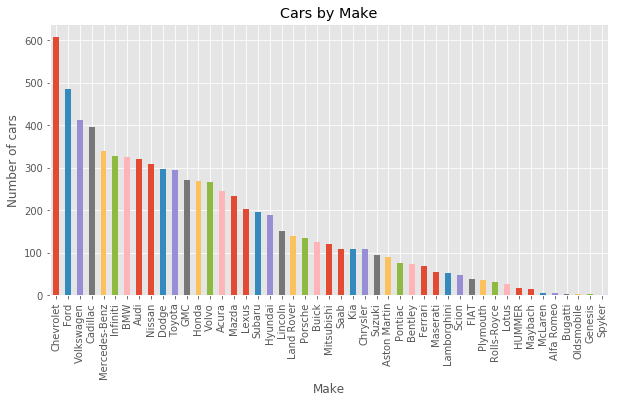

In [16]:
df['Make'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Cars by Make')
plt.ylabel('Number of cars')
plt.xlabel('Make')


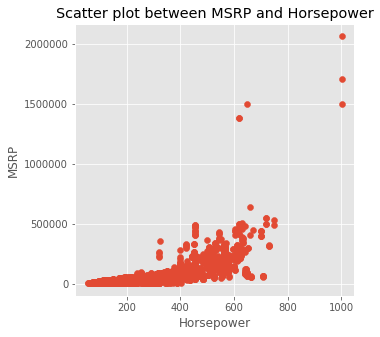

In [17]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['ehp'], df['msrp'])
plt.title('Scatter plot between MSRP and Horsepower')
ax.set_xlabel('Horsepower')
ax.set_ylabel('MSRP')
plt.show()

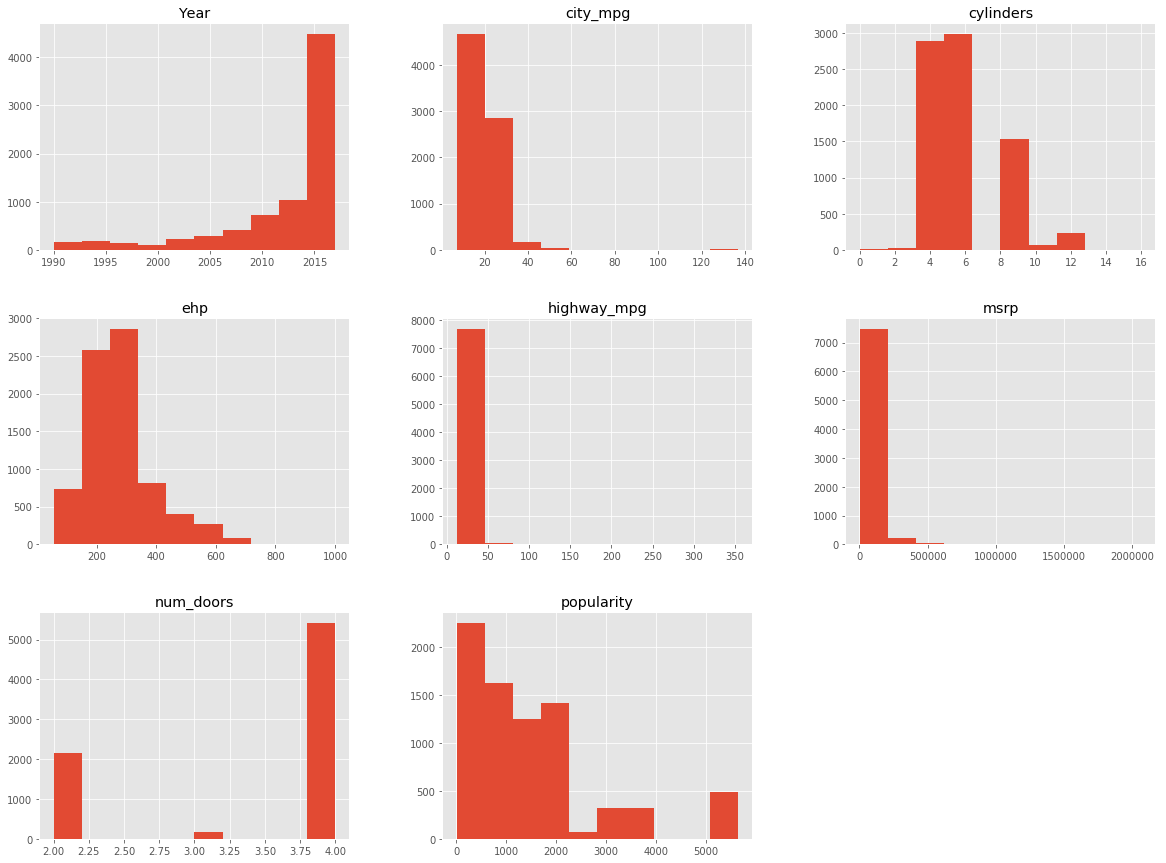

In [18]:
df.hist(figsize=(20,15));

## How should we deal with categorical features? 


In [19]:
df.nunique() #take a look at unique values 

Make               47
Model             713
Year               28
fuel_type           8
ehp               327
cylinders           9
trans_type          5
Driven_Wheels       4
num_doors           3
market_cat         70
vehicle_size        3
vehicle_style      16
highway_mpg        44
city_mpg           50
popularity         47
msrp             4644
dtype: int64

In [20]:
drop_vars = ['Make', 'Model', 'market_cat', 'Year']
df.drop(columns=drop_vars, axis=1, inplace=True)


In [21]:
df.head()

,fuel_type,ehp,cylinders,trans_type,Driven_Wheels,num_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [22]:
con_feats = ['ehp', 'highway_mpq', 'city_mpg', 'cylinders', 'num_doors']
cat_feats = ['fuel_type', 'trans_type', 'Driven_Wheels', 'vehicle_size', 'vehicle_style']

In [23]:
dummy = pd.get_dummies(df[cat_feats], drop_first=True)


In [24]:
df = pd.concat([df, dummy], axis = 1)
df = df.drop(['fuel_type', 'cylinders', 'trans_type',
            'Driven_Wheels', 'num_doors', 'vehicle_size', 'vehicle_style'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7735 entries, 0 to 11913
Data columns (total 36 columns):
ehp                                                       7735 non-null float64
highway_mpg                                               7735 non-null int64
city_mpg                                                  7735 non-null int64
popularity                                                7735 non-null int64
msrp                                                      7735 non-null int64
fuel_type_electric                                        7735 non-null uint8
fuel_type_flex-fuel (premium unleaded recommended/E85)    7735 non-null uint8
fuel_type_flex-fuel (premium unleaded required/E85)       7735 non-null uint8
fuel_type_flex-fuel (unleaded/E85)                        7735 non-null uint8
fuel_type_premium unleaded (recommended)                  7735 non-null uint8
fuel_type_premium unleaded (required)                     7735 non-null uint8
fuel_type_regular unleaded      

In [25]:
#clean up the new column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('/', '').str.replace('-', '')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7735 entries, 0 to 11913
Data columns (total 36 columns):
ehp                                                   7735 non-null float64
highway_mpg                                           7735 non-null int64
city_mpg                                              7735 non-null int64
popularity                                            7735 non-null int64
msrp                                                  7735 non-null int64
fuel_type_electric                                    7735 non-null uint8
fuel_type_flexfuel_premium_unleaded_recommendede85    7735 non-null uint8
fuel_type_flexfuel_premium_unleaded_requirede85       7735 non-null uint8
fuel_type_flexfuel_unleadede85                        7735 non-null uint8
fuel_type_premium_unleaded_recommended                7735 non-null uint8
fuel_type_premium_unleaded_required                   7735 non-null uint8
fuel_type_regular_unleaded                            7735 non-null uint8
tr

## Dealing with Outliers 
There are many ways to deal with outliers. Eliminating values outside of 3 standard deviations is common. Especially is your data is normal or normal looking after a transformation. 

Another good technique for summarizing a non-Gaussian distribution sample of data is the Interquartile Range, or IQR for short.

The IQR is calculated as the difference between the 75th and the 25th percentiles of the data and defines the box in a box and whisker plot.



In [26]:
from numpy import mean
from numpy import std

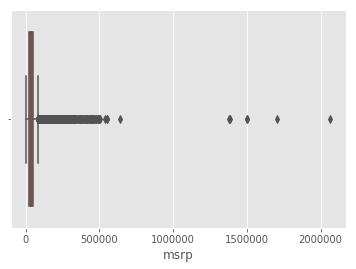

In [27]:
sns.boxplot(x=df['msrp'])

In [28]:
# calculate summary statistics
data_mean, data_std = mean(df.msrp), std(df.msrp)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [29]:
# identify outliers
outliers = [x for x in df.msrp if x < lower or x > upper]


In [31]:
outliers

[288000,
 291744,
 366000,
 455500,
 405500,
 372500,
 412000,
 379050,
 418950,
 320580,
 310543,
 310543,
 320580,
 410000,
 313088,
 313088,
 313088,
 456500,
 417000,
 506500,
 423500,
 463000,
 470350,
 430450,
 280225,
 270990,
 267990,
 441600,
 397500,
 548800,
 497650,
 441600,
 397500,
 548800,
 497650,
 443800,
 535500,
 490700,
 399500,
 363000,
 329990,
 329990,
 334990,
 340990,
 340990,
 440000,
 440000,
 337000,
 280400,
 280400,
 267000,
 267000,
 267000,
 299900,
 279900,
 309900,
 319900,
 328990,
 318990,
 359990,
 335000,
 283900,
 279500,
 270400,
 266000,
 282295,
 268660,
 273104,
 286739,
 295987,
 275861,
 284576,
 296387,
 290461,
 284976,
 290861,
 275461,
 294900,
 643330,
 315888,
 315888,
 319995,
 295000,
 295000,
 286750,
 319400,
 295850,
 329325,
 290000,
 296000,
 303300,
 1380000,
 1382750,
 375000,
 298900,
 303700,
 303700,
 335600,
 336400,
 369200,
 345400,
 378200,
 382400,
 354000,
 364000,
 392400,
 450000,
 433550,
 438325,
 449525,
 474600,

In [32]:
sorted(outliers)

[266000,
 267000,
 267000,
 267000,
 267990,
 268660,
 270400,
 270990,
 273104,
 275000,
 275461,
 275861,
 278295,
 279500,
 279900,
 280225,
 280400,
 280400,
 281170,
 282295,
 283695,
 283900,
 284576,
 284900,
 284976,
 286739,
 286750,
 287650,
 288000,
 290000,
 290461,
 290861,
 291744,
 291900,
 294025,
 294080,
 294900,
 295000,
 295000,
 295850,
 295987,
 296000,
 296295,
 296387,
 298900,
 299900,
 301695,
 302695,
 303300,
 303700,
 303700,
 304350,
 305650,
 309900,
 310543,
 310543,
 313088,
 313088,
 313088,
 315888,
 315888,
 318990,
 319400,
 319900,
 319995,
 320580,
 320580,
 320695,
 328990,
 329325,
 329990,
 329990,
 334990,
 335000,
 335600,
 336400,
 337000,
 340990,
 340990,
 345400,
 354000,
 359990,
 363000,
 364000,
 366000,
 369200,
 372500,
 375000,
 378200,
 379050,
 382400,
 392400,
 397500,
 397500,
 399500,
 402940,
 405500,
 407400,
 410000,
 412000,
 417000,
 417825,
 418950,
 423500,
 430450,
 433550,
 438325,
 440000,
 440000,
 441600,
 441600,
 

In [33]:
#subset msrp to eliminate outliers 
df = df[df.msrp < 266000]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7594 entries, 0 to 11913
Data columns (total 36 columns):
ehp                                                   7594 non-null float64
highway_mpg                                           7594 non-null int64
city_mpg                                              7594 non-null int64
popularity                                            7594 non-null int64
msrp                                                  7594 non-null int64
fuel_type_electric                                    7594 non-null uint8
fuel_type_flexfuel_premium_unleaded_recommendede85    7594 non-null uint8
fuel_type_flexfuel_premium_unleaded_requirede85       7594 non-null uint8
fuel_type_flexfuel_unleadede85                        7594 non-null uint8
fuel_type_premium_unleaded_recommended                7594 non-null uint8
fuel_type_premium_unleaded_required                   7594 non-null uint8
fuel_type_regular_unleaded                            7594 non-null uint8
tr

## Checking Assumptions 
<p style="color:blue">Initially we can only check for the assumptions of linearity and multicolinearity, Why?</p> 

* Linearity 
* Multicolinearity 

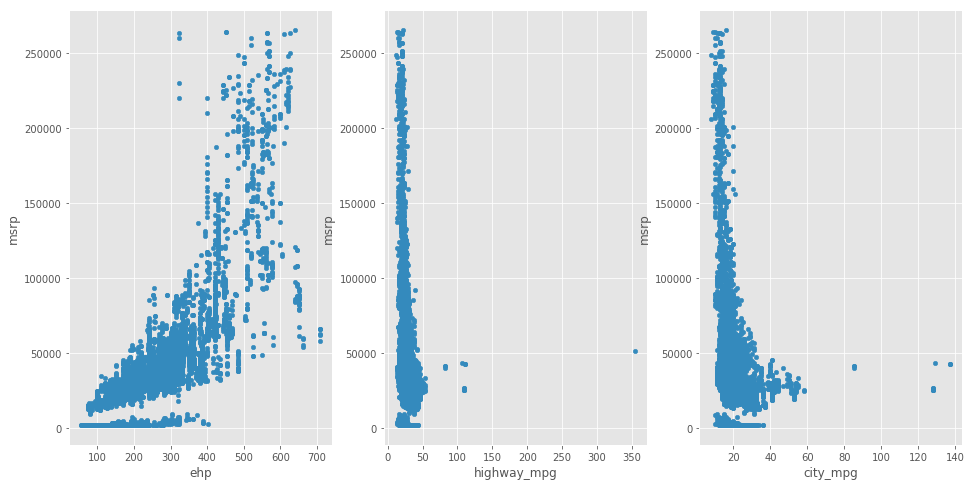

In [35]:
fig, axs = plt.subplots(1, 3,)
df.plot(kind='scatter', x='ehp', y='msrp', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='highway_mpg', y='msrp', ax=axs[1])
df.plot(kind='scatter', x='city_mpg', y='msrp', ax=axs[2])

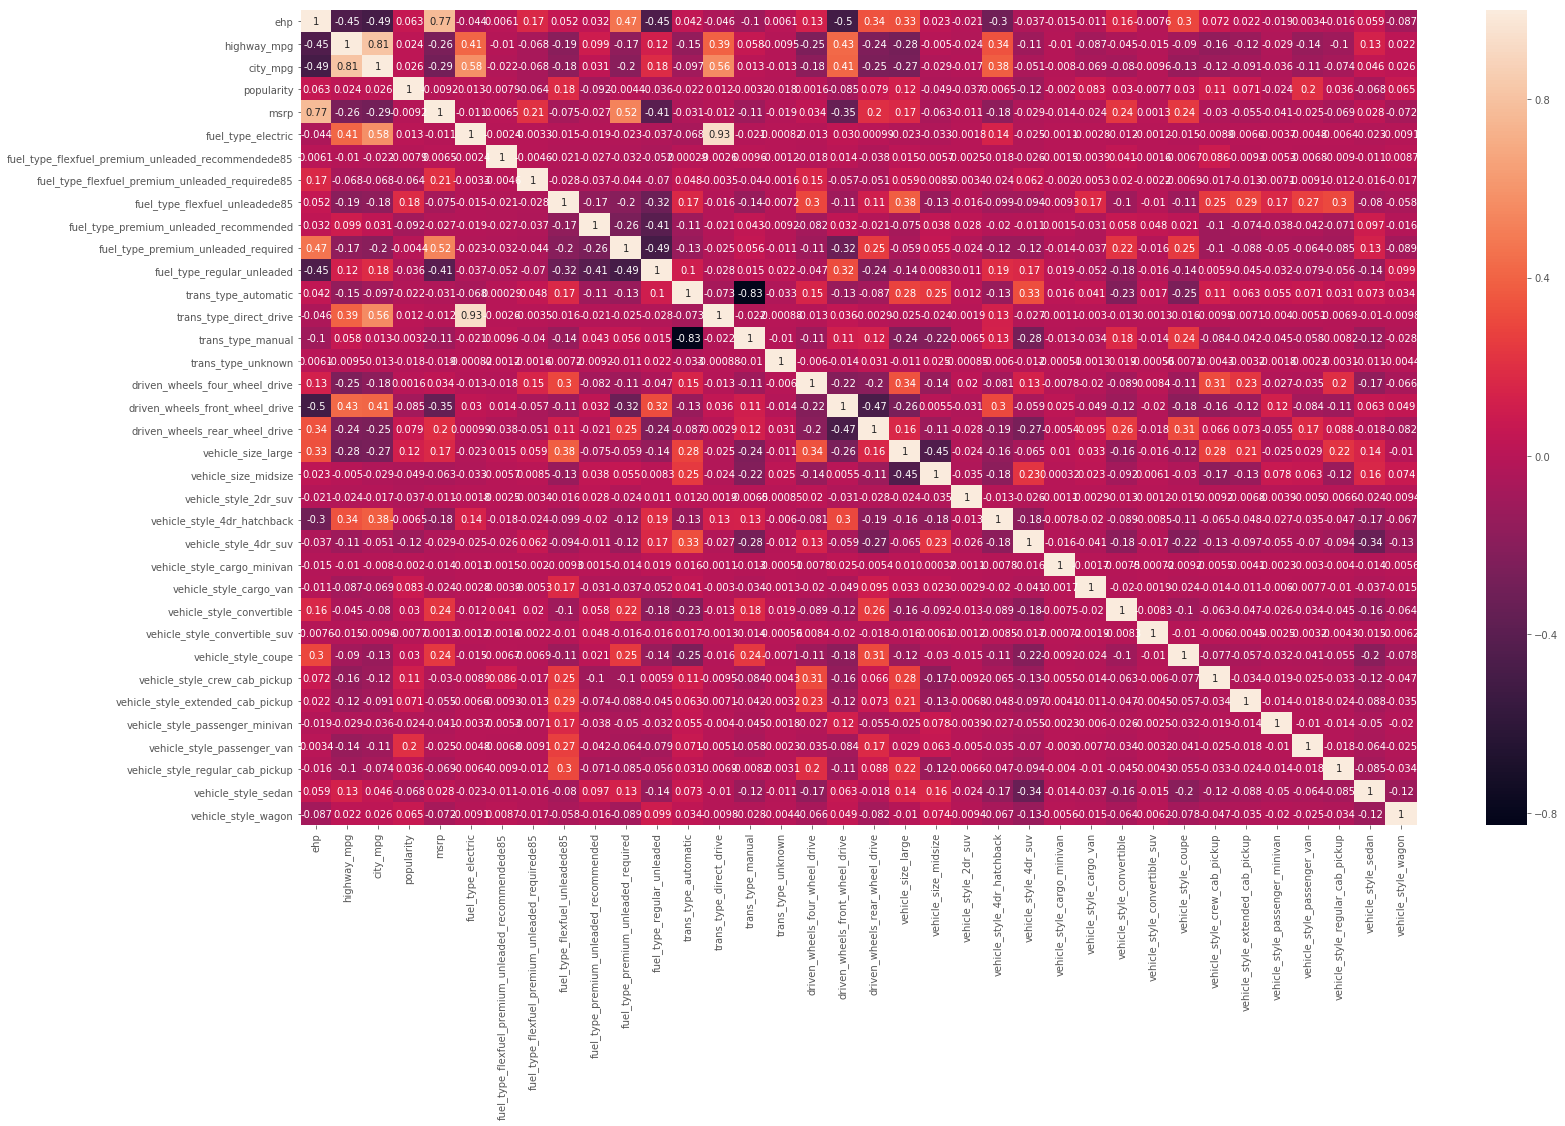

In [37]:
plt.figure(figsize=[25,15])
sns.heatmap(df.corr(),annot=True);

<p style="color:blue">The heatmap above doesn't look too helpful. Let's look at an alternative way to deal with multicollinearity - The Variance Inflation Factor.</p> 


In [38]:
outcome = 'msrp'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('ehp', 17.068775784744098),
 ('highway_mpg', 39.835929886531346),
 ('city_mpg', 37.626011467628054),
 ('popularity', 2.5118190484162026),
 ('fuel_type_electric', 8.017587494066692),
 ('fuel_type_flexfuel_premium_unleaded_recommendede85', 1.1479125217325394),
 ('fuel_type_flexfuel_premium_unleaded_requirede85', 1.3643437062082453),
 ('fuel_type_flexfuel_unleadede85', 6.152498321506998),
 ('fuel_type_premium_unleaded_recommended', 7.261489295195999),
 ('fuel_type_premium_unleaded_required', 10.24378066267359),
 ('fuel_type_regular_unleaded', 16.277747978529753),
 ('trans_type_automatic', 14.40211514816354),
 ('trans_type_direct_drive', 7.619191905838583),
 ('trans_type_manual', 4.03003751323359),
 ('trans_type_unknown', 1.0161153579431879),
 ('driven_wheels_four_wheel_drive', 1.8734159202197307),
 ('driven_wheels_front_wheel_drive', 3.1710791242027465),
 ('driven_wheels_rear_wheel_drive', 2.937684561676661),
 ('vehicle_size_large', 3.8340489059945444),
 ('vehicle_size_midsize', 3.48871

## Modelling
    - Train/Test Split 
    - Stats Models 

In [41]:
print(x_cols)

['ehp', 'highway_mpg', 'city_mpg', 'popularity', 'fuel_type_electric', 'fuel_type_flexfuel_premium_unleaded_recommendede85', 'fuel_type_flexfuel_premium_unleaded_requirede85', 'fuel_type_flexfuel_unleadede85', 'fuel_type_premium_unleaded_recommended', 'fuel_type_premium_unleaded_required', 'fuel_type_regular_unleaded', 'trans_type_automatic', 'trans_type_direct_drive', 'trans_type_manual', 'trans_type_unknown', 'driven_wheels_four_wheel_drive', 'driven_wheels_front_wheel_drive', 'driven_wheels_rear_wheel_drive', 'vehicle_size_large', 'vehicle_size_midsize', 'vehicle_style_2dr_suv', 'vehicle_style_4dr_hatchback', 'vehicle_style_4dr_suv', 'vehicle_style_cargo_minivan', 'vehicle_style_cargo_van', 'vehicle_style_convertible', 'vehicle_style_convertible_suv', 'vehicle_style_coupe', 'vehicle_style_crew_cab_pickup', 'vehicle_style_extended_cab_pickup', 'vehicle_style_passenger_minivan', 'vehicle_style_passenger_van', 'vehicle_style_regular_cab_pickup', 'vehicle_style_sedan', 'vehicle_style_wa

In [42]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

train, test = train_test_split(df)

In [43]:
print(len(train), len(test))

5695 1899


In [44]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   msrp   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     376.9
Date:                Mon, 16 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:15:14   Log-Likelihood:                -64675.
No. Observations:                5695   AIC:                         1.294e+05
Df Residuals:                    5659   BIC:                         1.297e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                           2932.1889   4048.699      0.724      0.469   -5004.813    1.09e+04
ehp                                                  267.4838      4.254     62.885      0.000     259.145     275.822
highway_mpg                                         -475.9519    138.021     -3.448      0.001    -746.526    -205.378
city_mpg                                             857.4418    125.727      6.820      0.000     610.969    1103.915
popularity                                            -1.1497      0.207     -5.564      0.000      -1.555      -0.745
fuel_type_electric                                 -5.082e+04   1.69e+04     -3.011      0.003   -8.39e+04   -1.77e+04
fuel_type_flexfuel_premium_unleaded_recommendede85 -1.316e+04   5379.908     -2.446      0.014   -2.37e+04   -2614.833
fuel_type_flexfuel_premium_unleaded_requirede85     3.075e+04   4348.968      7.072      0.000    2.22e+04    3.93e+04
fuel_type_flexfuel_unleadede85                     -1.985e+04   2367.546     -8.383      0.000   -2.45e+04   -1.52e+04
fuel_type_premium_unleaded_recommended             -2.081e+04   2170.635     -9.588      0.000   -2.51e+04   -1.66e+04
fuel_type_premium_unleaded_required                -2763.5869   2252.317     -1.227      0.220   -7178.992    1651.818
fuel_type_regular_unleaded                         -1.865e+04   2151.789     -8.665      0.000   -2.29e+04   -1.44e+04
trans_type_automatic                               -1.021e+04   1284.250     -7.949      0.000   -1.27e+04   -7690.839
trans_type_direct_drive                            -1.097e+04   1.49e+04     -0.738      0.460   -4.01e+04    1.82e+04
trans_type_manual                                  -1.916e+04   1323.263    -14.480      0.000   -2.18e+04   -1.66e+04
trans_type_unknown                                 -4.534e+04   1.48e+04     -3.064      0.002   -7.43e+04   -1.63e+04
driven_wheels_four_wheel_drive                     -4706.3254   1335.590     -3.524      0.000   -7324.593   -2088.058
driven_wheels_front_wheel_drive                      533.2989    842.172      0.633      0.527   -1117.681    2184.279
driven_wheels_rear_wheel_drive                     -6942.5945    864.333     -8.032      0.000   -8637.018   -5248.171
vehicle_size_large                                 -7198.9770   1115.218     -6.455      0.000   -9385.232   -5012.722
vehicle_size_midsize                               -1.261e+04    826.293    -15.264      0.000   -1.42e+04    -1.1e+04
vehicle_style_2dr_suv                              -3514.4420   7504.671     -0.468      0.640   -1.82e+04    1.12e+04
vehicle_style_4dr_hatchback                         1438.7599   1563.982      0.920      0.358   -1627.245  

In [45]:
#Backward Elimination
y = df['msrp']
cols = x_cols
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)


['ehp', 'city_mpg', 'popularity', 'fuel_type_electric', 'fuel_type_flexfuel_premium_unleaded_recommendede85', 'fuel_type_flexfuel_premium_unleaded_requirede85', 'fuel_type_flexfuel_unleadede85', 'fuel_type_premium_unleaded_recommended', 'fuel_type_regular_unleaded', 'trans_type_automatic', 'trans_type_manual', 'trans_type_unknown', 'driven_wheels_four_wheel_drive', 'driven_wheels_rear_wheel_drive', 'vehicle_size_large', 'vehicle_size_midsize', 'vehicle_style_4dr_hatchback', 'vehicle_style_4dr_suv', 'vehicle_style_cargo_van', 'vehicle_style_convertible', 'vehicle_style_coupe', 'vehicle_style_crew_cab_pickup', 'vehicle_style_extended_cab_pickup', 'vehicle_style_passenger_van', 'vehicle_style_wagon']


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [47]:

model = LinearRegression()
#Initializing RFE model
rfe = RFE(model)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)


[False False False False  True  True  True  True  True False  True  True
  True  True  True False  True False  True False False False False False
 False  True  True  True False  True False False  True False False]
[16 18 13 19  1  1  1  1  1 17  1  1  1  1  1 12  1  7  1 11  2  9  3  4
  5  1  1  1  6  1 14  8  1 10 15]
